# Making the Most of your Colab Subscription



In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')
'''
# Specify the path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/real data.zip'

# Specify the extraction destination
extract_path = '/content/drive/MyDrive/'

# Create the extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

# List extracted files
print("\nExtracted files:")
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))
      '''

Mounted at /content/drive


'\n# Specify the path to your zip file in Google Drive\nzip_path = \'/content/drive/MyDrive/real data.zip\'\n\n# Specify the extraction destination\nextract_path = \'/content/drive/MyDrive/\'\n\n# Create the extraction folder if it doesn\'t exist\nos.makedirs(extract_path, exist_ok=True)\n\n# Extract the zip file\nwith zipfile.ZipFile(zip_path, \'r\') as zip_ref:\n    zip_ref.extractall(extract_path)\n\nprint(f"Files extracted to: {extract_path}")\n\n# List extracted files\nprint("\nExtracted files:")\nfor root, dirs, files in os.walk(extract_path):\n    for file in files:\n        print(os.path.join(root, file))\n      '

## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Sep 12 08:36:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              51W / 400W |  11319MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
# prompt: write a code that gives me the full system specification of the current GPU , ram etc of the colab instance i am using. RAM, DISKSPACE, GPU and other important ones

!df -h
!cat /proc/cpuinfo
!nvidia-smi
!free -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         236G   33G  203G  14% /
tmpfs            64M     0   64M   0% /dev
shm              41G     0   41G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs            42G   76K   42G   1% /var/colab
/dev/sda1       242G   54G  189G  23% /kaggle/input
tmpfs            42G     0   42G   0% /proc/acpi
tmpfs            42G     0   42G   0% /proc/scsi
tmpfs            42G     0   42G   0% /sys/firmware
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 7
microcode	: 0xffffffff
cpu MHz		: 2200.210
cache size	: 39424 KB
physical id	: 0
siblings	: 12
core id		: 0
cpu cores	: 6
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopolo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe
data = {
    'Model': ['ViT', 'ViT', 'ViT', 'BiT', 'BiT', 'BiT', 'FixResNeXt', 'FixResNeXt', 'FixResNeXt', 'DeiT', 'DeiT', 'DeiT', 'EfficientNet', 'EfficientNet', 'EfficientNet'],
    'Dataset': ['Combined', 'Original', 'Synthetic'] * 5,
    'Training Loss': [0.6131, 0.5169, 0.6813, 0.5918, 0.4787, 0.6677, 0.6171, 0.4916, 0.6111, 0.5917, 0.5265, 0.6656, 0.2618, 0.1776, 0.4334],
    'Validation Loss': [0.5781, 0.4770, 0.6691, 0.5491, 0.5226, 0.6376, 0.5632, 0.3556, 0.5804, 0.5679, 0.4711, 0.5990, 0.2560, 0.1134, 0.5133]
}

df = pd.DataFrame(data)

# Set up the plot style
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the grouped bar chart
ax = sns.barplot(x='Model', y='value', hue='Dataset', data=pd.melt(df, id_vars=['Model', 'Dataset'], var_name='Loss Type', value_name='value'),
                 ci=None, edgecolor='black')

# Customize the plot
plt.title('Training and Validation Loss Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(title='Dataset', title_fontsize='12', fontsize='10')
plt.xticks(rotation=45)

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='center')

# Create a second legend for Loss Type
handles, labels = ax.get_legend_handles_labels()
second_legend = plt.legend(handles[:2], ['Training Loss', 'Validation Loss'],
                           title='Loss Type', loc='upper right', bbox_to_anchor=(1.25, 1))
ax.add_artist(second_legend)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('loss_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.close()

print("Loss comparison plot has been generated and saved as 'loss_comparison_plot.png'.")

<ipython-input-1-9672a74b2bc9>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='value', hue='Dataset', data=pd.melt(df, id_vars=['Model', 'Dataset'], var_name='Loss Type', value_name='value'),


Loss comparison plot has been generated and saved as 'loss_comparison_plot.png'.


In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#!pip install torch torchvision
#!pip install timm
#!pip install pillow
#!pip install -U scikit-learn scipy matplotlib
#!pip install seaborn
#!pip install ipywidgets

In [ ]:
import torch
import torchvision
import timm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from PIL import Image
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cuda


In [ ]:
# Define data directories
data_dir = '/content/drive/MyDrive/real data/source'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validate')
test_dir = os.path.join(data_dir, 'test')

In [ ]:
# EDA and Data Visualization
def plot_class_distribution(data_dir):
    classes = os.listdir(data_dir)
    class_sizes = [len(os.listdir(os.path.join(data_dir, cls))) for cls in classes]
    plt.figure(figsize=(10, 6))
    plt.bar(classes, class_sizes)
    plt.title(f'Class Distribution in {os.path.basename(data_dir)} Set')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

In [ ]:
def plot_image_sizes(data_dir):
    widths = []
    heights = []
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                with Image.open(os.path.join(root, file)) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20)
    plt.title('Image Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20)
    plt.title('Image Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_image_channels(data_dir):
    channels = []
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                with Image.open(os.path.join(root, file)) as img:
                    channels.append(len(img.getbands()))

    plt.figure(figsize=(8, 6))
    plt.hist(channels, bins=range(min(channels), max(channels) + 2, 1))
    plt.title('Image Channel Distribution')
    plt.xlabel('Number of Channels')
    plt.ylabel('Count')
    plt.show()

In [ ]:
def plot_sample_images(data_dir, num_samples=5):
    classes = os.listdir(data_dir)
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(15, 5 * len(classes)))

    for i, cls in enumerate(classes):
        class_dir = os.path.join(data_dir, cls)
        images = os.listdir(class_dir)
        samples = np.random.choice(images, num_samples, replace=False)

        for j, sample in enumerate(samples):
            img = Image.open(os.path.join(class_dir, sample))
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_ylabel(cls)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pixel_intensity_distribution(data_dir):
    intensities = []
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                with Image.open(os.path.join(root, file)) as img:
                    img_array = np.array(img)
                    intensities.extend(img_array.flatten())

    plt.figure(figsize=(10, 6))
    plt.hist(intensities, bins=256, range=(0, 255), density=True)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.show()

In [ ]:
# Perform EDA
print("Performing Exploratory Data Analysis...")

Performing Exploratory Data Analysis...


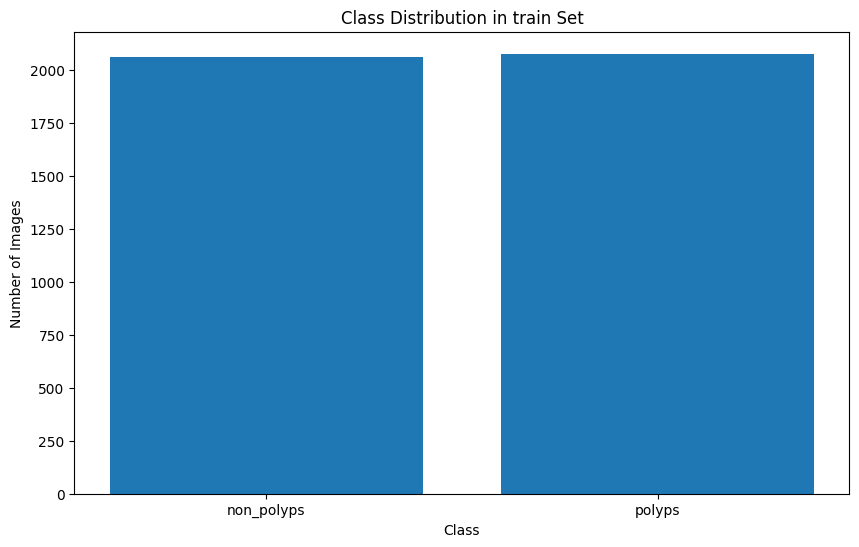

In [ ]:
plot_class_distribution(train_dir)

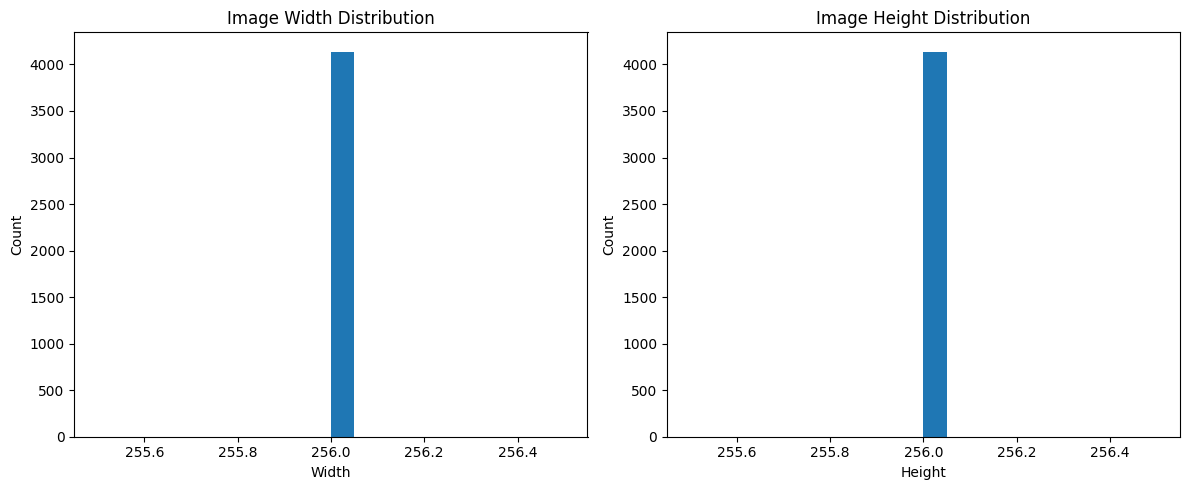

In [ ]:
plot_image_sizes(train_dir)

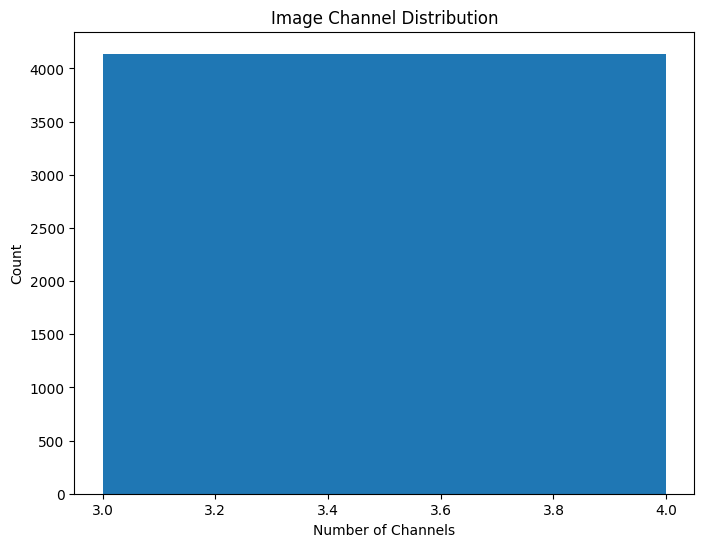

In [ ]:
plot_image_channels(train_dir)

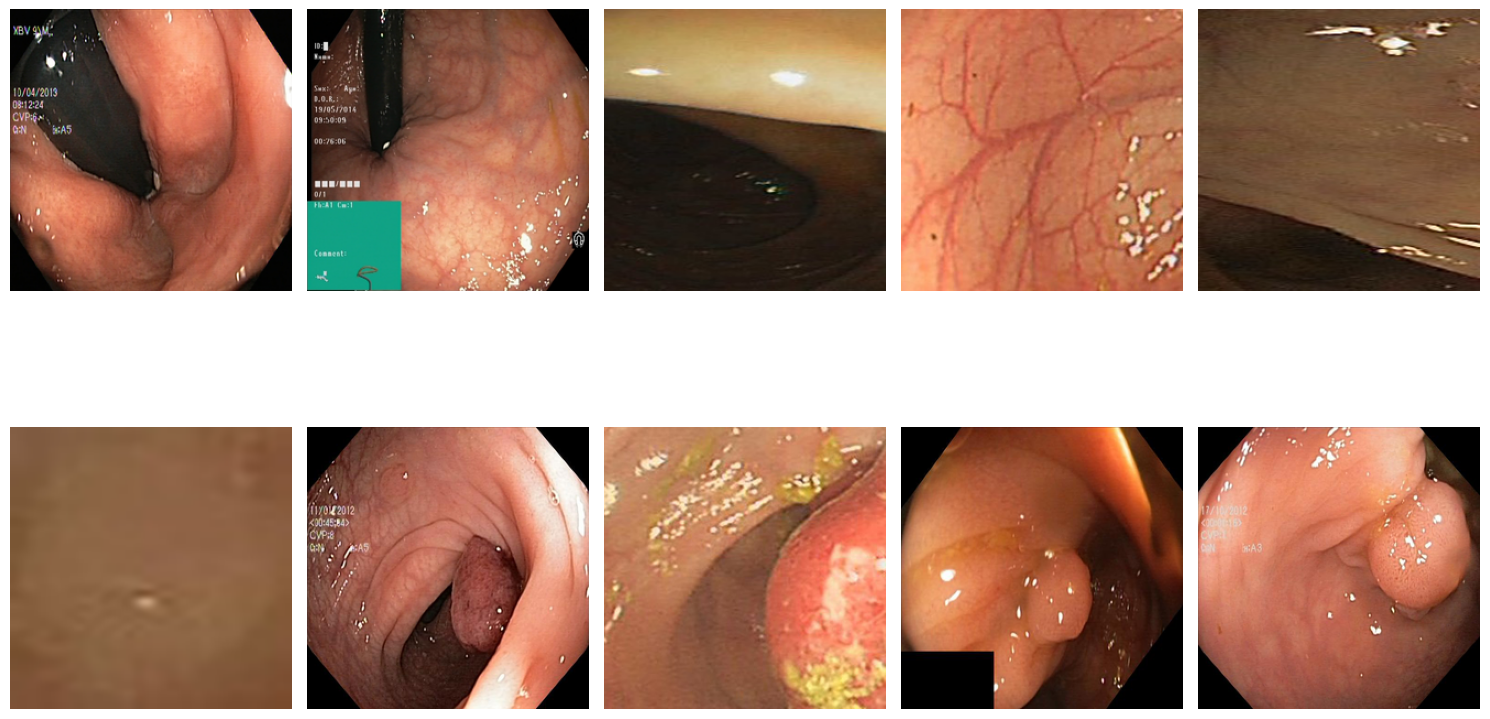

In [ ]:
plot_sample_images(train_dir)

In [ ]:
# Define transforms with data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Create datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=test_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define models
models = {
    'ViT': timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=2),
    'BiT': timm.create_model('resnetv2_101x1_bit.goog_in21k_ft_in1k', pretrained=True, num_classes=2),
    'FixResNeXt': timm.create_model('resnext101_32x8d', pretrained=True, num_classes=2),
    'DeiT': timm.create_model('deit_base_patch16_224', pretrained=True, num_classes=2),
    'EfficientNet': timm.create_model('efficientnet_b0', pretrained=True, num_classes=2)
}

In [ ]:
# Evaluation function
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    total_loss = 0
    criterion = torch.nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    return avg_loss, all_labels, all_preds

In [ ]:
def calculate_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predictions, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predictions, average='weighted', zero_division=0)
    try:
        auc = roc_auc_score(true_labels, predictions)
    except ValueError:
        auc = float('nan')
    return accuracy, precision, recall, f1, auc

In [ ]:
def plot_roc(true_labels, predictions, title):
    fpr, tpr, _ = roc_curve(true_labels, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Training function with early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, patience=5):
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")
        for i, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            progress_bar.set_postfix({'Loss': f'{total_loss/(i+1):.4f}'})

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluate on validation set
        val_loss, _, _ = evaluate_model(model, val_loader)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Learning rate scheduling
        scheduler.step(val_loss)

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), f'best_model_{model.__class__.__name__}.pth')
        else:
            epochs_no_improve += 1

        # Early stopping
        if epochs_no_improve == patience:
            print(f"Early stopping triggered after {epoch + 1} epochs")
            early_stop = True
            break

    # Load best model
    model.load_state_dict(torch.load(f'best_model_{model.__class__.__name__}.pth'))
    return model, train_losses, val_losses, early_stop

In [ ]:
def plot_combined_roc(all_labels, all_predictions, all_model_names, title):
    plt.figure(figsize=(10, 8))
    for labels, predictions, model_name in zip(all_labels, all_predictions, all_model_names):
        fpr, tpr, _ = roc_curve(labels, predictions)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Combined ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_loss_curves(train_losses, val_losses, title, early_stop):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - {title}')
    if early_stop:
        plt.axvline(x=len(val_losses)-1, color='r', linestyle='--', label='Early Stopping')
    plt.legend()
    plt.show()

In [ ]:
# Main execution
all_train_labels = []
all_train_predictions = []
all_val_labels = []
all_val_predictions = []
all_test_labels = []
all_test_predictions = []
model_names = []

In [ ]:
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}")
    model = model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    trained_model, train_losses, val_losses, early_stop = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler)

    print("\nFinal Evaluation:")
    # Evaluate on training set
    train_loss, train_labels, train_preds = evaluate_model(trained_model, train_loader)
    train_accuracy, train_precision, train_recall, train_f1, train_auc = calculate_metrics(train_labels, train_preds)
    print(f"Training - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}")

    # Evaluate on validation set
    val_loss, val_labels, val_preds = evaluate_model(trained_model, val_loader)
    val_accuracy, val_precision, val_recall, val_f1, val_auc = calculate_metrics(val_labels, val_preds)
    print(f"Validation - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}")

    # Evaluate on test set
    test_loss, test_labels, test_preds = evaluate_model(trained_model, test_loader)


Training and evaluating ViT


Epoch 1/10: 100%|██████████| 130/130 [01:21<00:00,  1.59it/s, Loss=0.8556]


Epoch 1/10 - Train Loss: 0.8556, Val Loss: 0.7136


Epoch 2/10: 100%|██████████| 130/130 [01:22<00:00,  1.58it/s, Loss=0.5933]


Epoch 2/10 - Train Loss: 0.5933, Val Loss: 0.4969


Epoch 3/10: 100%|██████████| 130/130 [01:22<00:00,  1.58it/s, Loss=0.5649]


Epoch 3/10 - Train Loss: 0.5649, Val Loss: 0.4924


Epoch 4/10: 100%|██████████| 130/130 [01:22<00:00,  1.58it/s, Loss=0.5532]


Epoch 4/10 - Train Loss: 0.5532, Val Loss: 0.5058


Epoch 5/10: 100%|██████████| 130/130 [01:21<00:00,  1.60it/s, Loss=0.5413]


Epoch 5/10 - Train Loss: 0.5413, Val Loss: 0.4770


Epoch 6/10: 100%|██████████| 130/130 [01:21<00:00,  1.59it/s, Loss=0.5628]


Epoch 6/10 - Train Loss: 0.5628, Val Loss: 0.5210


Epoch 7/10: 100%|██████████| 130/130 [01:21<00:00,  1.60it/s, Loss=0.5716]


Epoch 7/10 - Train Loss: 0.5716, Val Loss: 0.4854


Epoch 8/10: 100%|██████████| 130/130 [01:21<00:00,  1.60it/s, Loss=0.5602]


Epoch 8/10 - Train Loss: 0.5602, Val Loss: 0.5720


Epoch 9/10: 100%|██████████| 130/130 [01:21<00:00,  1.60it/s, Loss=0.5739]


Epoch 9/10 - Train Loss: 0.5739, Val Loss: 0.4939


Epoch 10/10: 100%|██████████| 130/130 [01:21<00:00,  1.60it/s, Loss=0.5320]


Epoch 10/10 - Train Loss: 0.5320, Val Loss: 0.4930
Early stopping triggered after 10 epochs


<ipython-input-53-6cea04f1ad80>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_{model.__class__.__name__}.pth'))



Final Evaluation:
Training - Loss: 0.5169, Accuracy: 0.75%, Precision: 0.7539, Recall: 0.7523, F1: 0.7518, AUC: 0.7522
Validation - Loss: 0.4770, Accuracy: 0.79%, Precision: 0.8174, Recall: 0.7889, F1: 0.7839, AUC: 0.7883

Training and evaluating BiT


Epoch 1/10: 100%|██████████| 130/130 [01:04<00:00,  2.03it/s, Loss=0.8025]


Epoch 1/10 - Train Loss: 0.8025, Val Loss: 0.7598


Epoch 2/10: 100%|██████████| 130/130 [01:04<00:00,  2.02it/s, Loss=0.7030]


Epoch 2/10 - Train Loss: 0.7030, Val Loss: 0.6393


Epoch 3/10: 100%|██████████| 130/130 [01:04<00:00,  2.02it/s, Loss=0.6507]


Epoch 3/10 - Train Loss: 0.6507, Val Loss: 0.6083


Epoch 4/10: 100%|██████████| 130/130 [01:04<00:00,  2.02it/s, Loss=0.6126]


Epoch 4/10 - Train Loss: 0.6126, Val Loss: 0.5673


Epoch 5/10: 100%|██████████| 130/130 [01:04<00:00,  2.03it/s, Loss=0.5897]


Epoch 5/10 - Train Loss: 0.5897, Val Loss: 0.5226


Epoch 6/10: 100%|██████████| 130/130 [01:04<00:00,  2.02it/s, Loss=0.5475]


Epoch 6/10 - Train Loss: 0.5475, Val Loss: 0.5631


Epoch 7/10: 100%|██████████| 130/130 [01:03<00:00,  2.03it/s, Loss=0.5635]


Epoch 7/10 - Train Loss: 0.5635, Val Loss: 0.5324


Epoch 8/10: 100%|██████████| 130/130 [01:03<00:00,  2.03it/s, Loss=0.5502]


Epoch 8/10 - Train Loss: 0.5502, Val Loss: 0.6532


Epoch 9/10: 100%|██████████| 130/130 [01:04<00:00,  2.03it/s, Loss=0.5301]


Epoch 9/10 - Train Loss: 0.5301, Val Loss: 0.5737


Epoch 10/10: 100%|██████████| 130/130 [01:04<00:00,  2.03it/s, Loss=0.4931]


Epoch 10/10 - Train Loss: 0.4931, Val Loss: 0.5226


<ipython-input-53-6cea04f1ad80>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_{model.__class__.__name__}.pth'))



Final Evaluation:
Training - Loss: 0.4787, Accuracy: 0.77%, Precision: 0.7697, Recall: 0.7695, F1: 0.7694, AUC: 0.7695
Validation - Loss: 0.5226, Accuracy: 0.73%, Precision: 0.7896, Recall: 0.7348, F1: 0.7214, AUC: 0.7341

Training and evaluating FixResNeXt


Epoch 1/10: 100%|██████████| 130/130 [01:12<00:00,  1.79it/s, Loss=0.7249]


Epoch 1/10 - Train Loss: 0.7249, Val Loss: 0.7068


Epoch 2/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.7050]


Epoch 2/10 - Train Loss: 0.7050, Val Loss: 0.7006


Epoch 3/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.6898]


Epoch 3/10 - Train Loss: 0.6898, Val Loss: 0.6737


Epoch 4/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.6517]


Epoch 4/10 - Train Loss: 0.6517, Val Loss: 0.5376


Epoch 5/10: 100%|██████████| 130/130 [01:13<00:00,  1.78it/s, Loss=0.6023]


Epoch 5/10 - Train Loss: 0.6023, Val Loss: 0.5244


Epoch 6/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.5581]


Epoch 6/10 - Train Loss: 0.5581, Val Loss: 0.4611


Epoch 7/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.5440]


Epoch 7/10 - Train Loss: 0.5440, Val Loss: 0.4522


Epoch 8/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.5205]


Epoch 8/10 - Train Loss: 0.5205, Val Loss: 0.3755


Epoch 9/10: 100%|██████████| 130/130 [01:13<00:00,  1.76it/s, Loss=0.4849]


Epoch 9/10 - Train Loss: 0.4849, Val Loss: 0.5146


Epoch 10/10: 100%|██████████| 130/130 [01:13<00:00,  1.77it/s, Loss=0.4940]


Epoch 10/10 - Train Loss: 0.4940, Val Loss: 0.3556


<ipython-input-53-6cea04f1ad80>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_{model.__class__.__name__}.pth'))



Final Evaluation:
Training - Loss: 0.4916, Accuracy: 0.78%, Precision: 0.7808, Recall: 0.7782, F1: 0.7777, AUC: 0.7783
Validation - Loss: 0.3556, Accuracy: 0.86%, Precision: 0.8623, Recall: 0.8598, F1: 0.8595, AUC: 0.8597

Training and evaluating DeiT


Epoch 1/10: 100%|██████████| 130/130 [01:23<00:00,  1.55it/s, Loss=0.6734]


Epoch 1/10 - Train Loss: 0.6734, Val Loss: 0.5445


Epoch 2/10: 100%|██████████| 130/130 [01:24<00:00,  1.54it/s, Loss=0.5582]


Epoch 2/10 - Train Loss: 0.5582, Val Loss: 0.5113


Epoch 3/10: 100%|██████████| 130/130 [01:24<00:00,  1.54it/s, Loss=0.5647]


Epoch 3/10 - Train Loss: 0.5647, Val Loss: 0.5452


Epoch 4/10: 100%|██████████| 130/130 [01:23<00:00,  1.55it/s, Loss=0.5615]


Epoch 4/10 - Train Loss: 0.5615, Val Loss: 0.5109


Epoch 5/10: 100%|██████████| 130/130 [01:24<00:00,  1.54it/s, Loss=0.5335]


Epoch 5/10 - Train Loss: 0.5335, Val Loss: 0.4868


Epoch 6/10: 100%|██████████| 130/130 [01:24<00:00,  1.54it/s, Loss=0.5373]


Epoch 6/10 - Train Loss: 0.5373, Val Loss: 0.5250


Epoch 7/10: 100%|██████████| 130/130 [01:23<00:00,  1.55it/s, Loss=0.5233]


Epoch 7/10 - Train Loss: 0.5233, Val Loss: 0.4950


Epoch 8/10: 100%|██████████| 130/130 [01:23<00:00,  1.56it/s, Loss=0.5263]


Epoch 8/10 - Train Loss: 0.5263, Val Loss: 0.4728


Epoch 9/10: 100%|██████████| 130/130 [01:24<00:00,  1.54it/s, Loss=0.5259]


Epoch 9/10 - Train Loss: 0.5259, Val Loss: 0.5383


Epoch 10/10: 100%|██████████| 130/130 [01:23<00:00,  1.55it/s, Loss=0.5311]


Epoch 10/10 - Train Loss: 0.5311, Val Loss: 0.4711


<ipython-input-53-6cea04f1ad80>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_{model.__class__.__name__}.pth'))



Final Evaluation:
Training - Loss: 0.5265, Accuracy: 0.75%, Precision: 0.7582, Recall: 0.7528, F1: 0.7516, AUC: 0.7530
Validation - Loss: 0.4711, Accuracy: 0.80%, Precision: 0.8056, Recall: 0.8024, F1: 0.8018, AUC: 0.8022

Training and evaluating EfficientNet


Epoch 1/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=1.1003]


Epoch 1/10 - Train Loss: 1.1003, Val Loss: 0.2763


Epoch 2/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.4226]


Epoch 2/10 - Train Loss: 0.4226, Val Loss: 0.1986


Epoch 3/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.3111]


Epoch 3/10 - Train Loss: 0.3111, Val Loss: 0.2248


Epoch 4/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.3047]


Epoch 4/10 - Train Loss: 0.3047, Val Loss: 0.1859


Epoch 5/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.2681]


Epoch 5/10 - Train Loss: 0.2681, Val Loss: 0.1367


Epoch 6/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.2749]


Epoch 6/10 - Train Loss: 0.2749, Val Loss: 0.1432


Epoch 7/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.2561]


Epoch 7/10 - Train Loss: 0.2561, Val Loss: 0.1483


Epoch 8/10: 100%|██████████| 130/130 [01:02<00:00,  2.07it/s, Loss=0.2534]


Epoch 8/10 - Train Loss: 0.2534, Val Loss: 0.1283


Epoch 9/10: 100%|██████████| 130/130 [01:02<00:00,  2.06it/s, Loss=0.2299]


Epoch 9/10 - Train Loss: 0.2299, Val Loss: 0.1134


Epoch 10/10: 100%|██████████| 130/130 [01:03<00:00,  2.06it/s, Loss=0.2328]


Epoch 10/10 - Train Loss: 0.2328, Val Loss: 0.1437

Final Evaluation:


<ipython-input-53-6cea04f1ad80>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_{model.__class__.__name__}.pth'))


Training - Loss: 0.1776, Accuracy: 0.93%, Precision: 0.9325, Recall: 0.9316, F1: 0.9316, AUC: 0.9317
Validation - Loss: 0.1134, Accuracy: 0.97%, Precision: 0.9680, Recall: 0.9679, F1: 0.9679, AUC: 0.9679
